In [ ]:
import pandas as pd
import numpy as np

In [ ]:
%%writefile sales_data.csv
연도,판매량,매출,순이익
2015,103,500000,370000
2016,70,300000,190000
2017,130,400000,300000
2018,60,550000,480000
2019,190,700000,600000
2020,230,680000,590000

In [ ]:
sales_data = pd.read_csv('sales_data.csv', index_col='연도', header=0, sep=',')

In [ ]:
sales_data = {
 '연도':[2015, 2016, 2017, 2018, 2019, 2020],
 '판매량':[103, 70, 130, 160, 190, 230],
 '매출':[500000, 300000, 400000, 550000, 700000, 680000],
 '순이익':[370000, 190000, 300000, 480000, 600000, 590000]
}

In [ ]:
sales_data = pd.DataFrame(sales_data)

In [ ]:
sales_data

In [ ]:
sales_data['순이익율'] = (sales_data['순이익']/sales_data['매출']) * 100

In [ ]:
def check(n):
    if n > 80:
        return '높음'
    else:
        return '낮음'

In [ ]:
# sales_data['순이익율_비교'] = sales_data['순이익율'].call(check)
# sales_data
sales_data['순이익율_비교'] = sales_data['순이익율'].apply(check)
sales_data

In [ ]:
sales_data["teat2"] = (sales_data[sales_data['판매량'] <100]['판매량']+50)

In [ ]:
sales_data

In [ ]:
sales_data.loc[6] = [2021, 360, 720000, 650000, "",0]

In [ ]:
sales_data.drop(['순이익율','순이익율_비교'],axis=1,inplace=True)

In [ ]:
sales_data

In [ ]:
sales_data1 = {
    '연도':[2015, 2016, 2017, 2018],
    '판매량':[103, 70, 130, 160],
    '매출':[500000, 300000, 400000, 550000],
    '순이익':[370000, 190000, 300000, 480000]
 }

sales_data2 = {
    '연도':[2019, 2020],
    '판매량':[190, 230],
    '매출':[700000, 680000],
    '순이익':[ 600000, 590000]
}


In [ ]:
sales_data1 = pd.DataFrame(sales_data1)
sales_data2 = pd.DataFrame(sales_data2)

In [ ]:
sales_data1.append(sales_data2,ignore_index=True)

In [ ]:
sales_df = pd.concat([sales_data1,sales_data2],ignore_index=True)

In [ ]:
cost_data = {
    '연도':[2015, 2016, 2017, 2018],
    '이자':[1520, 1120, 1360, 1680],
    '관리비':[650, 400, 750, 800],
    '세금':[12000, 8900, 10900, 12800] }


In [ ]:
cost_data = pd.DataFrame(cost_data)


In [ ]:
pd.merge(sales_df, cost_data, on='연도', how='inner')

In [ ]:
pd.merge(sales_df, cost_data, on='연도', how='outer')

In [ ]:
pd.merge(sales_df, cost_data, on='연도', how='left')

In [ ]:
pd.merge(sales_df, cost_data, on='연도', how='right')

In [ ]:
df = pd.DataFrame(np.random.randint(1, 100, size=(8, 2)),
index=[['A창고','A창고','A창고','A창고','B창고','B창고','B창고','B창고'],
['사과','배','바나나','사과','사과','배','바나나','배']],
columns=['판매','재고'])
df.index.names = ['창고명','상품명']


In [ ]:
df

In [ ]:
df.groupby('창고명').sum()

In [ ]:
df.groupby('상품명').sum()

In [ ]:
df.groupby(['창고명','상품명']).sum()

## 실습02

In [ ]:
df = pd.DataFrame(np.random.randint(1, 100, size=(15, 3)),
index=[['1학년','1학년','1학년','1학년','1학년','2학년','2학년','2학년','2학년','2학년','3학년','3학년','3학년','3학년','3학년'],
['1반','2반','3반','4반','5반','1반','2반','3반','4반','5반','1반','2반','3반','4반','5반']],
columns=['국어','영어','과학'])

In [ ]:
df['총점'] = df['국어'] + df['영어'] + df['과학']

In [ ]:
df["평균"] = df['총점'] / 3

In [ ]:
df

In [ ]:
df_index = df
df_index.index.names=['학년','반']

In [ ]:
df_index = df_index.groupby('학년').sum()

In [ ]:
df_index['평균'] = df_index['평균']/5
df_index

## 실습03

In [ ]:
#df 선언
df_titanic = pd.read_csv('titanic_train.csv')

### 실습 03-1 결측지처리를해주세요.(age-평균값적용,Cabin-N으로,Embarked-N)

In [ ]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
df_titanic['Cabin'] = df_titanic['Cabin'].fillna('N')
df_titanic['Embarked'] = df_titanic['Embarked'].fillna('N')

### 실습03-2 성별(Sex)생존자합을구해주세요

In [ ]:
df_titanic.groupby('Sex').sum()['Survived']

### 실습03-3 클래스(Pclass)별생존자합을구해주세요

In [ ]:
df_titanic.groupby('Pclass').sum()['Survived']

### 실습03-4 나이(Age)를활용유아,10대,20대,30대,40대,50대,60대,노인의생존자합을구해주세요.

In [ ]:
conlist = [(df_titanic['Age']<10),
((df_titanic['Age']>=10) & (df_titanic['Age']<20)),
((df_titanic['Age']>=20) & (df_titanic['Age']<30)),
((df_titanic['Age']>=30) & (df_titanic['Age']<40)),
((df_titanic['Age']>=40) & (df_titanic['Age']<50)),
((df_titanic['Age']>=50) & (df_titanic['Age']<60)),
((df_titanic['Age']>=60) & (df_titanic['Age']<70)),
(df_titanic['Age'])>=70]

choilist =['유아','10대','20대','30대','40대','50대','60대','노인']

df_titanic["Ages"] = np.select(conlist,choilist,default='Not Specified')

df_titanic.groupby('Ages').mean()['Survived']

## 실습03
### 실습03-1 30대이면서1등석에탄사람의수

In [ ]:
df_titanic[(df_titanic["Ages"] == '30대')&(df_titanic['Pclass'] == 1)]['Pclass'].count()

### 실습03-2 클래스(Pclass)별나이평균

In [ ]:
df_titanic.groupby("Pclass").mean()['Age']

### 실습03-3 클래스(Pclass)와성별에따른생존율

In [ ]:
df_titanic.groupby(['Pclass','Sex']).mean()['Survived']

### 실습 03-4 나이(Age)대별로생존율구하기

In [ ]:
df_titanic2 = pd.read_csv('titanic_train.csv')

conlist = [(df_titanic2['Age']<10),
((df_titanic2['Age']>=10) & (df_titanic2['Age']<20)),
((df_titanic2['Age']>=20) & (df_titanic2['Age']<30)),
((df_titanic2['Age']>=30) & (df_titanic2['Age']<40)),
((df_titanic2['Age']>=40) & (df_titanic2['Age']<50)),
((df_titanic2['Age']>=50) & (df_titanic2['Age']<60)),
((df_titanic2['Age']>=60) & (df_titanic2['Age']<70)),
((df_titanic2['Age']>=70) & (df_titanic2['Age']<80)),
(df_titanic2['Age']>=80)]

choilist =['0','10','20','30','40','50','60','70','80']

df_titanic2["Ages_2"] = np.select(conlist,choilist,default='-1')

df_titanic2.groupby('Ages_2').mean()['Survived']

In [362]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
x=[10,14,19,20,25]
plt.plot(x)
plt.show()

x=np.arange(-4.5,5,0.5)
y=x**2
plt.plot(x,y)
plt.show() 

In [ ]:
x=np.arange(-4.5,5,0.5)
y1=x**2
y2=x+30
y3=x**2+10
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

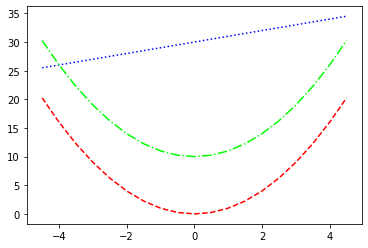

In [356]:
x = np.arange(-4.5, 5, 0.5)
y1 = x**2
y2 = x+30
y3 = x**2+10
plt.plot(x, y1, color="red", linestyle="dashed")
plt.plot(x, y2, "b:")
plt.plot(x, y3, color='#00FF00', linestyle="-.")
plt.show()

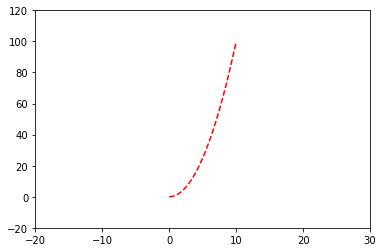

In [357]:
x=np.linspace(0,10,100)
y=x**2
plt.plot(x,y,'--r')
# plt.xlim(-20,30)
# plt.ylim(-20,120)
plt.axis([-20,30,-20,120])
plt.show()


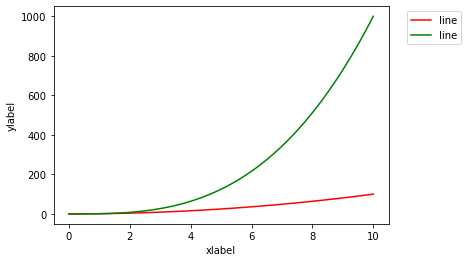

In [367]:
plt.rc('font',family='MalgunGothic')

x=np.linspace(0,10,100)
y1=x**2
y2=x**3

#선라벨
plt.plot(x,y1,'r',label='line')
plt.plot(x,y2,'g',label='line')

#x축,y축라벨
plt.xlabel('xlabel')
plt.ylabel('ylabel')

#plt.legend(loc=2)#선라벨표위치(그래프내)
plt.legend(bbox_to_anchor=(1.04,1))#선라벨표위치(그래프밖)
plt.show()

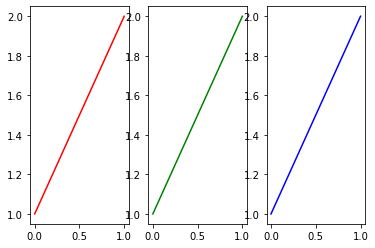

In [368]:
plt.subplot(131)
plt.plot([1,2],color='r')

plt.subplot(132)
plt.plot([1,2],color='g')

plt.subplot(133)
plt.plot([1,2],color='b')
plt.show()


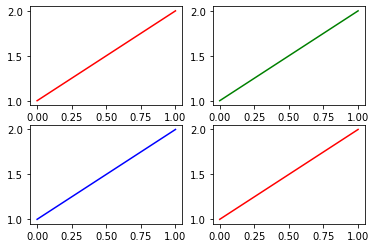

In [369]:
plt.subplot(221)
plt.plot([1,2],color='r')
plt.subplot(222)
plt.plot([1,2],color='g')
plt.subplot(223)
plt.plot([1,2],color='b')
plt.subplot(224)
plt.plot([1,2],color='r')
plt.show()


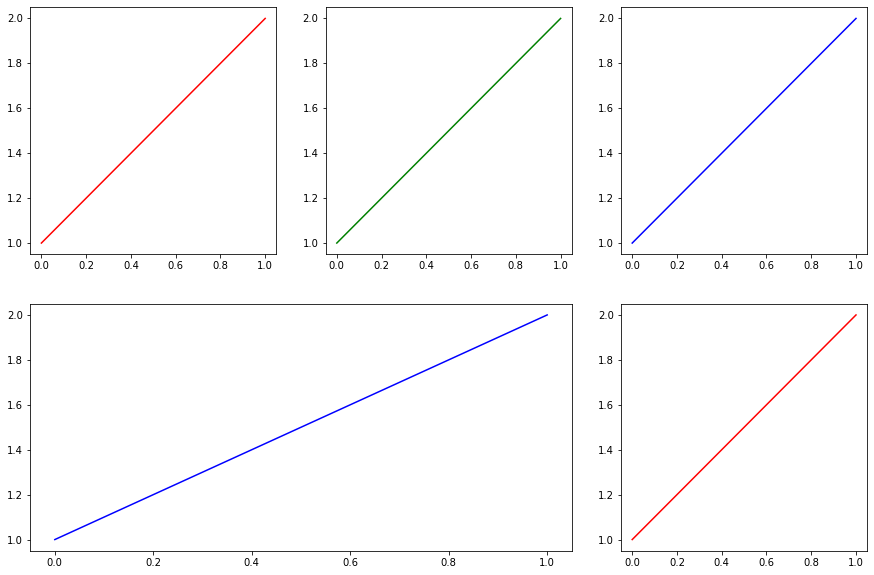

In [371]:
plt.figure(figsize=(15,10)) #그래프전체크기
grid=plt.GridSpec(2,3) #GridSpec(행,열)

plt.subplot(grid[0,0])
plt.plot([1,2],color='r')

plt.subplot(grid[0,1])
plt.plot([1,2],color='g')

plt.subplot(grid[0,2])
plt.plot([1,2],color='b')

plt.subplot(grid[1,:2]) #plt.subplot(grid[1,0:2])
plt.plot([1,2],color='b')

plt.subplot(grid[1,2])
plt.plot([1,2],color='r')

plt.show()


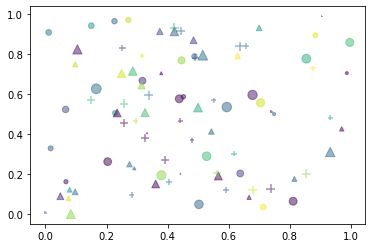

In [376]:
x=np.random.rand(30)
y=np.random.rand(30)
a=np.random.rand(30)
b=np.random.rand(30)
e=np.random.rand(30)
f=np.random.rand(30)
color=np.random.rand(30)

size = 100*np.random.rand(30)

plt.scatter(x,y, s=size, c= color, alpha=0.5, marker='o')
plt.scatter(a,b, s=size, c= color, alpha=0.5, marker='^')
plt.scatter(e,f, s=size, c= color, alpha=0.5, marker='+')

plt.show()

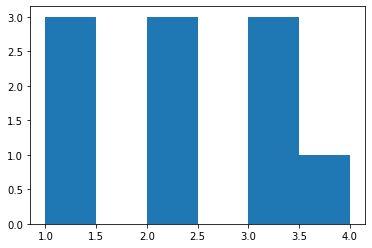

In [379]:
data=[np.random.randint(1,7) for i in range(10)]
plt.hist(data,bins=6,alpha=1)
plt.show()


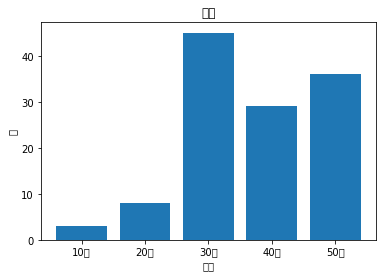

In [387]:
plt.bar(['10대','20대','30대','40대','50대'],[np.random.randint(1,50) for i in range(5)])

# plt.bar(['10대','20대','30대','40대','50대'],[np.random.randint(1,50)for i in range(5)],color='g')
plt.title('제목')
plt.xlabel('나이')
plt.ylabel('값')
plt.show()